# Analyzing Sales Data - A Short Project

This project was inspired by a video by YouTuber and Data Scientist Keith Galli, linked below. 

* https://www.youtube.com/watch?v=eMOA1pPVUc4&ab_channel=KeithGalli

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import seaborn as sns

# Import all necessary files

In [244]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data/")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

## Optional but clean: save this DataFrame to a new csv

In [245]:
all_months_data.to_csv("all_data.csv", index = False)

In [246]:
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


## Clean data - take out NaN wherever possible

In [247]:
all_data = all_data.dropna(how = "all") ##Take out rows that are entirely NaN values

## Add a month column

In [248]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


* Above tells us that the "Order Date" column is actually just a bunch of objects, rather than DateTimes, so we'll have to use a str method to find month

### When we initially try to convert the month string to an int, we get an error that there is a string "Or". So we need to find "Or" and delete it

* What's really happening is that the column headers got duplicated in a lot of rows, so "Order Date" cells are showing "Order Date" as the value

In [249]:
temp_df = all_data[all_data["Order Date"].str[0:2] == "Or"]
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


* Now that we know which rows have messed up data, we can set the DataFrame equal to everything EXCEPT where "or" is true:

In [250]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Finally, create new column "Month"

In [251]:
all_data["Month"] = all_data["Order Date"].str[0:2]

### Convert string to int

In [252]:
all_data["Month"] = all_data["Month"].astype("int32")

In [253]:
all_data.info() ##double check that it worked

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


### It probably would've been simpler to convert the Order Date column to a datetime here and pulled the month, especially given the fact that we use a datetime method later on.

# Question: What was the best month for sales, and how much was earned that month?

* Need to create a new column "Sales" that multiplies "Quantity Ordered" by "Price Each"

In [254]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype("int32")
all_data["Price Each"] = all_data["Price Each"].astype("float")

all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]

In [255]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


<AxesSubplot:xlabel='Month'>

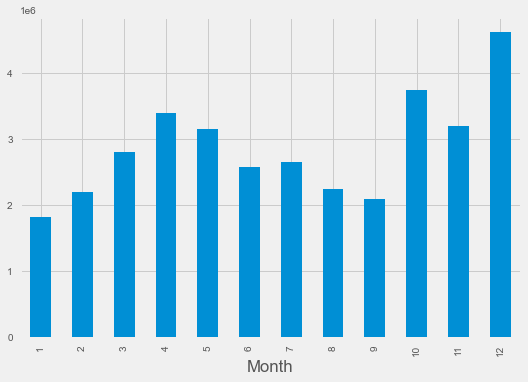

In [256]:
all_data.groupby("Month")["Sales"].sum().plot(kind = "bar")

## Alternatively, a little prettier...

In [257]:
plt.style.use("fivethirtyeight")

total_sales = all_data.groupby("Month")["Sales"].sum()

months = range(1, 13)

<function matplotlib.pyplot.show(close=None, block=None)>

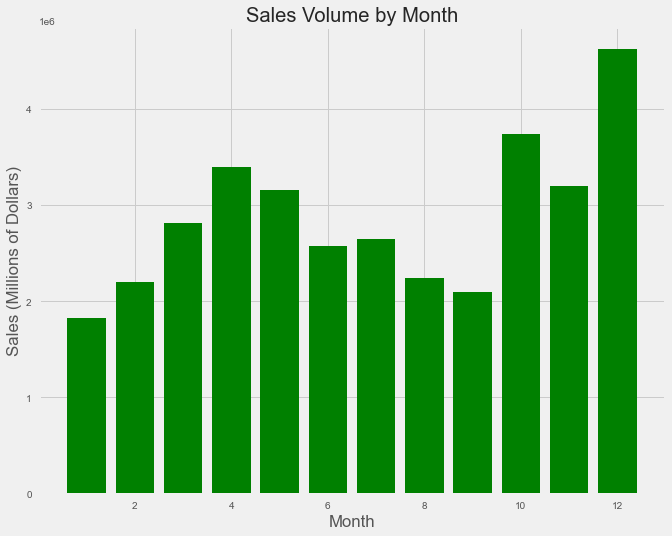

In [258]:
plt.figure(figsize = (10,8))

plt.bar(months, total_sales, color = "green")

plt.title("Sales Volume by Month")
plt.xlabel("Month")
plt.ylabel("Sales (Millions of Dollars)")

plt.show

* How much was earned in December?

In [259]:
total_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

* Answer: $4,613,443.34

# Question 2: Which City had the most Sales?

In [260]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95
...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95


* Below is a method test - extracting a stirng within a string

In [261]:
address = "136 Church St, New York City, NY 10001"

address.split(sep = ", ")[1]

'New York City'

In [262]:
##Split columns based on ", " seperator, expand into new columns, then choose index 1 on new list, i.e. ["Street Address", "City", "State")
all_data["City"] = all_data["Purchase Address"].str.split(", ", expand = True)[1]

all_data["City"].value_counts() #double checking that this works

San Francisco    44732
Los Angeles      29605
New York City    24876
Boston           19934
Atlanta          14881
Dallas           14820
Seattle          14732
Portland         12465
Austin            9905
Name: City, dtype: int64

In [263]:
city = all_data.groupby("City")["Sales"].sum()

<AxesSubplot:xlabel='City'>

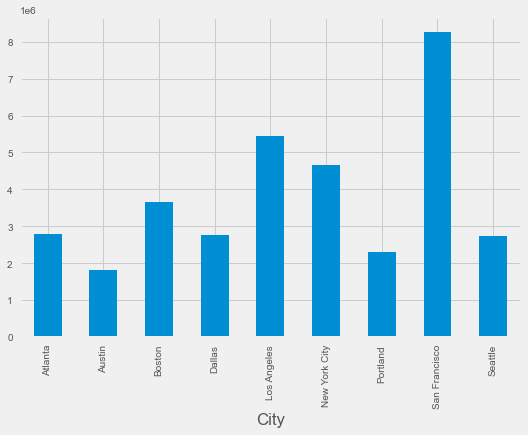

In [264]:
city.plot(kind = "bar")

In [265]:
city.sort_values(ascending = False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

### Answer: San Francisco had $8,262,203.91 in total sales.

# Question 3: What time should we advertise our product to maximize our customers' likelihood of buying?

In [266]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta
...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",6,2.99,Boston
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",6,149.99,New York City
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco


### Approach: convert Order Date to DateTime type, and aggregate by hour.

In [267]:
all_data["Order Date"] = pd.to_datetime(all_data["Order Date"])

In [268]:
all_data.info() #checking that it worked!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int32         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Sales             185950 non-null  float64       
 8   City              185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(4)
memory usage: 12.8+ MB


### We'll do two plots - one with number of items ordered each hour and one with total $ earned each hour

In [269]:
all_data["hour"] = all_data["Order Date"].dt.hour

products_by_hour = all_data.groupby("hour")["Quantity Ordered"].sum()

sales_by_hour = all_data.groupby("hour")["Sales"].sum()

* Now we'll check which times are best for sales

In [270]:
products_by_hour.sort_values(ascending = False)

hour
19    14470
12    14202
11    14005
18    13802
20    13768
13    13685
14    12362
10    12308
21    12244
17    12229
16    11662
15    11391
22     9899
9      9816
23     7065
8      7002
7      4556
0      4428
6      2810
1      2619
5      1493
2      1398
4       937
3       928
Name: Quantity Ordered, dtype: int32

In [271]:
sales_by_hour.sort_values(ascending = False)

hour
19    2412938.54
12    2316821.34
11    2300610.24
20    2281716.24
18    2219348.30
13    2155389.80
17    2129361.61
14    2083672.73
21    2042000.86
10    1944286.77
15    1941549.60
16    1904601.31
9     1639030.58
22    1607549.21
8     1192348.97
23    1179304.44
7      744854.12
0      713721.27
1      460866.88
6      448113.00
2      234851.44
5      230679.82
4      162661.01
3      145757.89
Name: Sales, dtype: float64

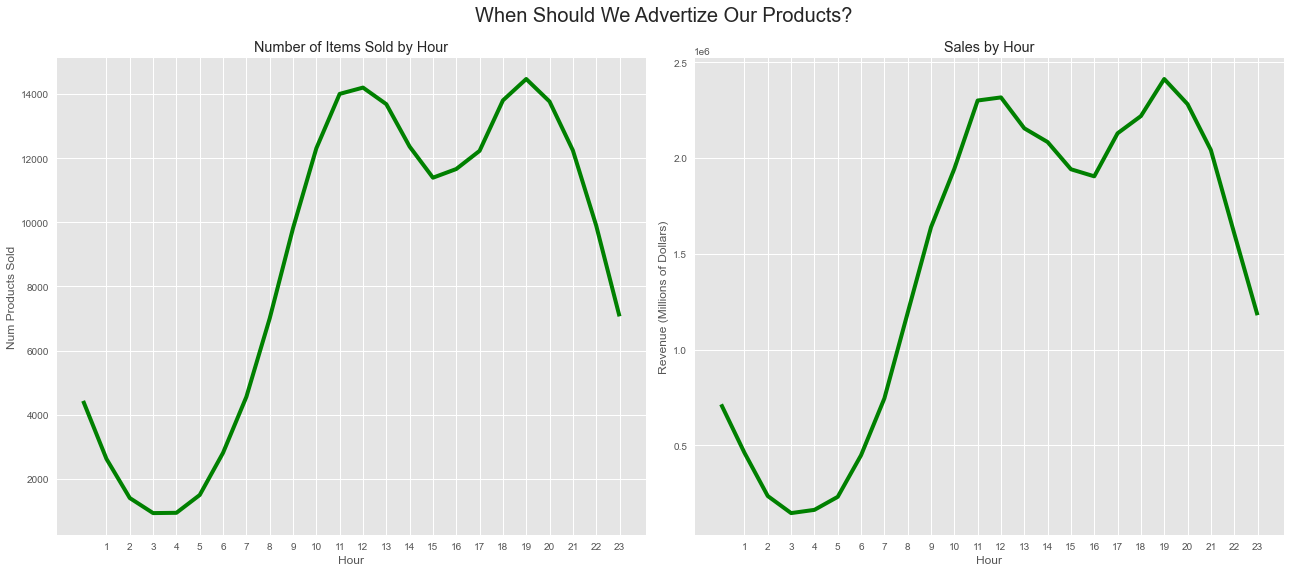

In [272]:
plt.style.use("ggplot")

fig, axs = plt.subplots(1, 2, figsize = (18, 8))

fig.suptitle("When Should We Advertize Our Products?", fontsize = 20)
fig.tight_layout(pad = 2)


products_by_hour.plot(ax = axs[0], xticks = range(1,24), title = "Number of Items Sold by Hour", color = "green", linewidth = 4)
sales_by_hour.plot(ax = axs[1], xticks = range(1,24), title = "Sales by Hour", color = "green", linewidth = 4)

axs[0].set_xlabel("Hour")
axs[0].set_ylabel("Num Products Sold")
axs[1].set_xlabel("Hour")
axs[1].set_ylabel("Revenue (Millions of Dollars)")


plt.show()

### To maximize revenue, we should advertize our products just before 11am and again just before 7pm.

# Question 4: Which products are most often sold together?

In [273]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


In [274]:
all_data["Order ID"].value_counts().sort_values(ascending = False) #exploring here, are there multiple items associated with one order ID?

160873    5
235798    4
196615    4
193511    4
165665    4
         ..
212995    1
213013    1
212996    1
212997    1
222909    1
Name: Order ID, Length: 178437, dtype: int64

In [275]:
multiple_items = all_data[all_data.duplicated(subset = "Order ID", keep = False) == True]

multiple_items

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,hour
16,295681,Google Phone,1,600.00,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,600.00,Boston,12
17,295681,USB-C Charging Cable,1,11.95,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.95,Boston,12
18,295681,Bose SoundSport Headphones,1,99.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,99.99,Boston,12
19,295681,Wired Headphones,1,11.99,2019-12-25 12:37:00,"79 Elm St, Boston, MA 02215",12,11.99,Boston,12
36,295698,Vareebadd Phone,1,400.00,2019-12-13 14:32:00,"175 1st St, New York City, NY 10001",12,400.00,New York City,14
...,...,...,...,...,...,...,...,...,...,...
186820,222882,AA Batteries (4-pack),1,3.84,2019-06-18 11:37:00,"990 Walnut St, Los Angeles, CA 90001",6,3.84,Los Angeles,11
186822,222884,Google Phone,1,600.00,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,600.00,New York City,12
186823,222884,USB-C Charging Cable,1,11.95,2019-06-04 12:06:00,"819 Pine St, New York City, NY 10001",6,11.95,New York City,12
186842,222903,iPhone,1,700.00,2019-06-07 22:21:00,"685 Hickory St, New York City, NY 10001",6,700.00,New York City,22


In [276]:
multiple_items["Order ID"].value_counts().sort_values(ascending = False)

160873    5
312462    4
295681    4
212334    4
304802    4
         ..
213754    2
213797    2
213802    2
213805    2
222903    2
Name: Order ID, Length: 7136, dtype: int64

### Credit for the below solution largely goes to Keith Galli and the links below:

* https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

* https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

In [277]:
multiple_items['Grouped'] = multiple_items.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = multiple_items[['Order ID', 'Grouped']].drop_duplicates()

/var/folders/0q/35tyq0m91fd57yvctygqq57c0000gn/T/ipykernel_26871/2185361549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  multiple_items['Grouped'] = multiple_items.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [278]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


# Question 5: What product sold the most? Why do you think it sold the most?

In [279]:
most_sold = all_data["Product"].value_counts().sort_values(ascending = False).head(10)

most_sold

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
Name: Product, dtype: int64

Text(0, 0.5, 'Num Sold')

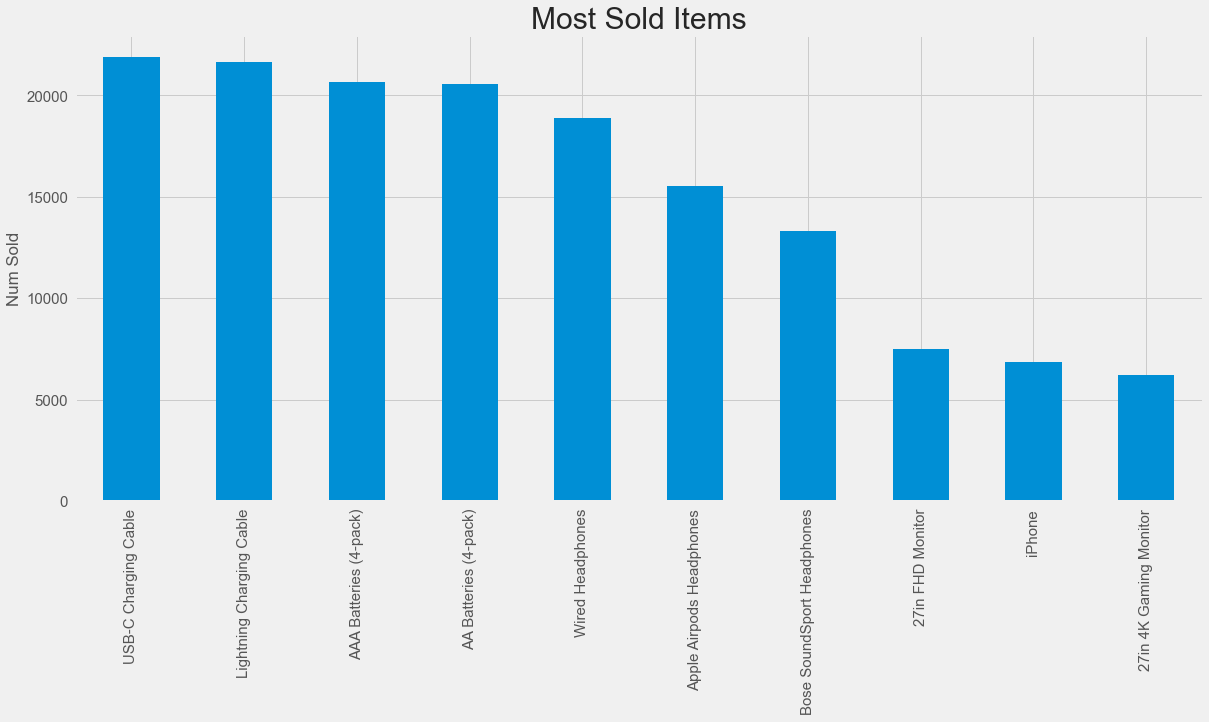

In [280]:
plt.style.use("fivethirtyeight")

plt.figure(figsize = (18, 8))

most_sold.plot(kind = "bar")

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

plt.title("Most Sold Items", fontsize = 30)
plt.ylabel("Num Sold")


### The USB-C Charging Cable sold the most units. A charging cable is required to use most of the other products sold in this store. 